Homework 10 -Evan Varan lze4

# 0. Imports

In [361]:
import numpy as np
from scipy.signal import ellip, freqz, lfilter, filtfilt, butter, freqs
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 0.a Helper Functions

In [362]:
# lowpass.numerator, highpass.numerator, and bandpass.numerator were found using http://t-filter.engineerjs.com/

def get_filter_coefficents(filter_type):
    with open(f'{filter_type}.numerator', 'r') as file:
        coefficents = [float(line.strip()) for line in file.readlines()]
    return coefficents

def plot_filter(filter_type):
    with open(f'{filter_type}.numerator', 'r') as file:
        coefficents = [float(line.strip()) for line in file.readlines()]

    #Converting our filter coefficents from the website to the frequency response
    frequency_response = np.fft.fft(coefficents, 1024)
    freq = np.fft.fftfreq(len(frequency_response), d=1/1024)
    plt.figure(figsize=(10, 4))
    plt.plot(freq[:512], 20 * np.log10(abs(frequency_response[:512])), 'b')  # Only need to plot half of the filter
    plt.title(f'Frequency Response of the {filter_type} Filter')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.show()


def use_filter_on_wav(read_file_name, filter_type, write_file_name, plot_one_name, plot_two_name):
    sampling_rate, data = wavfile.read(read_file_name)
    #Checking that all data is floating point
    if data.dtype != np.float32:
        data = data.astype(np.float32) / np.max(np.abs(data))
    
    
    y = [1.0] #Denominator = [1.0] for FIR filter
    x = get_filter_coefficents(filter_type)

    # Apply the filter
    filtered_data_graph = lfilter(x, y, data) #For graphing
    filtered_data = lfilter(x, y, data) #For listening

    #Checking for undefined or infinite data
    if np.any(np.isnan(filtered_data)) or np.any(np.isinf(filtered_data)):
        print("NaN or Infinity encountered in data.")
        filtered_data = np.nan_to_num(filtered_data)  # Replace NaNs and Infinities

    # Convert back to int16 for WAV file output
    filtered_data = np.int16(filtered_data / np.max(np.abs(filtered_data)) * 32767)
    wavfile.write(write_file_name, sampling_rate, filtered_data)

    plt.figure(figsize=(15, 6))
    plt.subplot(2, 1, 1)
    plt.plot(data, label='Original Noise')
    plt.title(plot_one_name)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.ylim(-1,1)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(filtered_data_graph, label='Filtered Noise', color='green')
    plt.title(plot_two_name)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.ylim(-1,1)
    plt.legend()

    plt.tight_layout()
    plt.show()

# 1. Creating Filters
Lowpass

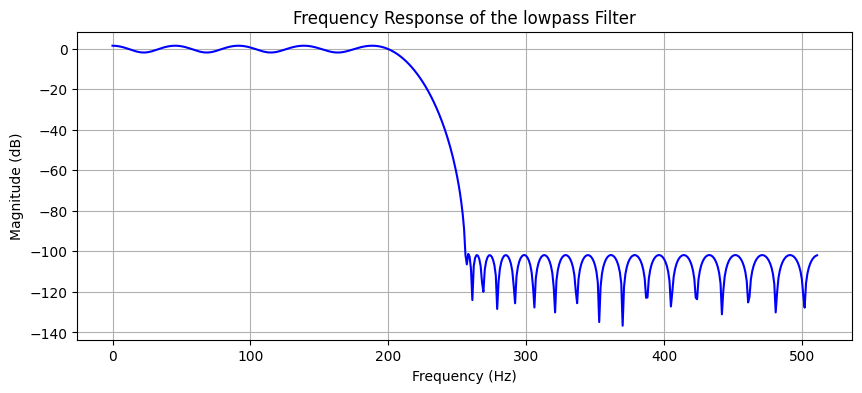

In [363]:
# Lowpass:  (minimum order ~60)
# Sampling rate: 8000 Hz
# Passband: 0-1000Hz @ < 1dB ripple
# Stopband: 1500-4000Hz @ > 100dB attenuation

plot_filter("lowpass")

# 1.a HighPass

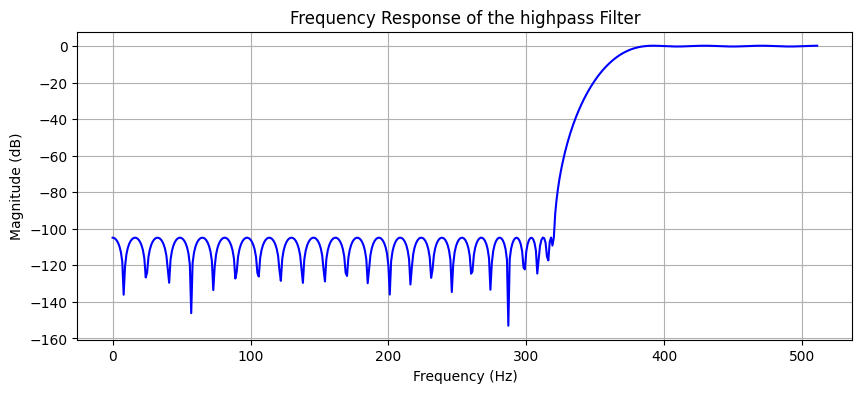

In [364]:
# Highpass: (minimum order ~60)
# Sampling rate: 8000 Hz
# Passband: 3000-4000Hz @ < 1dB ripple
# Stopband: 0-2500Hz @ > 100dB attenuation
plot_filter("highpass")

# 1.b Bandpass

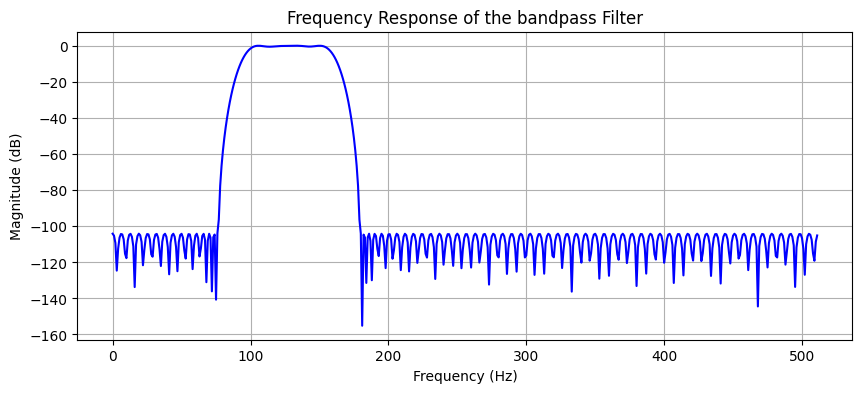

In [365]:
# Bandpass: (minimum order ~150)
# Sampling rate: 8000 Hz
# Passband: 800-1200Hz @ 1dB ripple
# Stopband: 0-600Hz and 1400-4000Hz @ -100dB
plot_filter("bandpass")

# 2. WAV Files
Generating a gaussian noise sequence

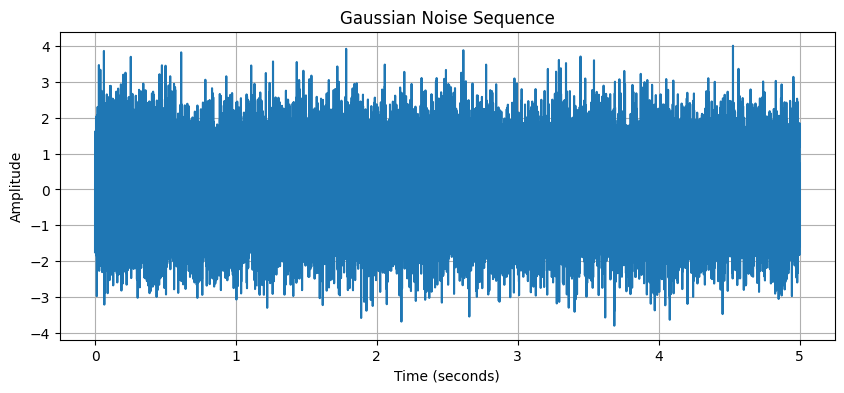

In [366]:
sampling_rate = 8000
duration = 5 
num_samples = sampling_rate * duration

# Generate noise
np.random.seed(100)
noise = np.random.normal(0, 1, num_samples) 

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, duration, num_samples), noise)
plt.title('Gaussian Noise Sequence')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 2.a Turning our Gaussian Noise into a WAV

In [367]:
normalized_noise = noise / np.max(np.abs(noise)).astype(np.float32)
wavfile.write('gaussian_noise.wav', sampling_rate, normalized_noise)

#Int 16 so computer can open
normalized_noise_16 = np.int16(noise / np.max(np.abs(noise)) * 32767)
wavfile.write('gaussian_noise_int16.wav', sampling_rate, normalized_noise_16)

# 3. Using our filters on our created WAV file
Lowpass Filter

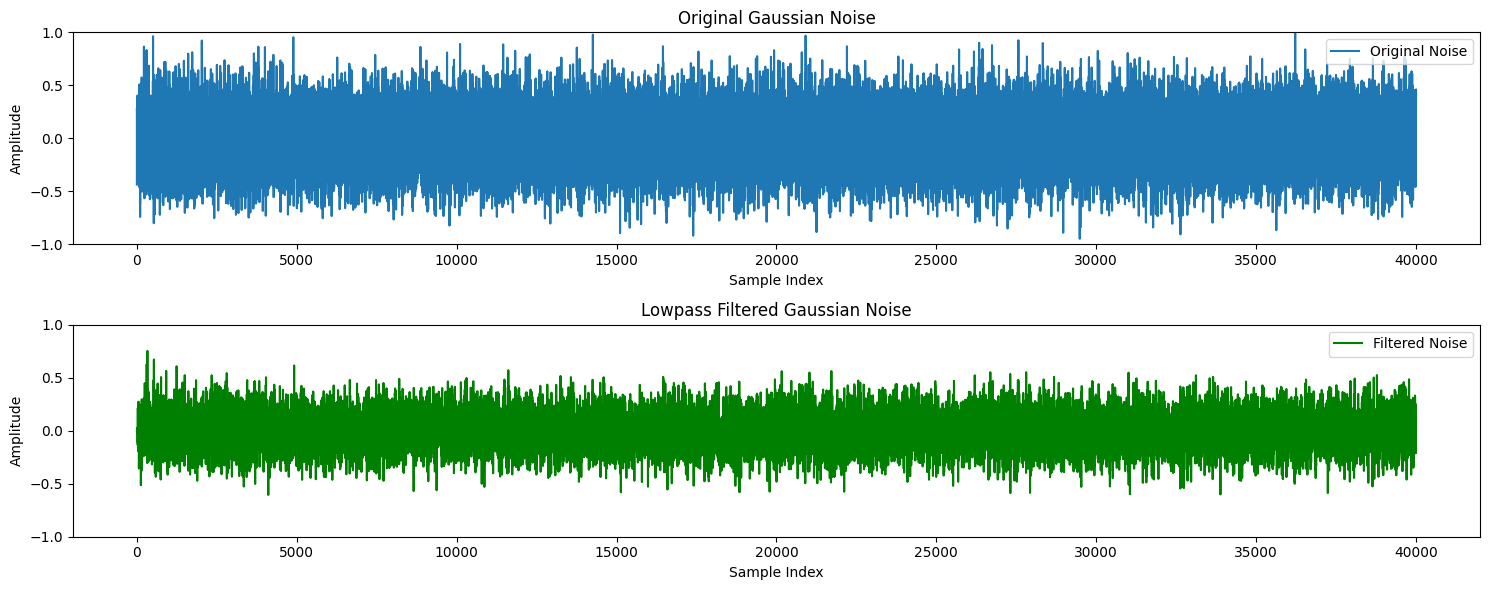

In [368]:
use_filter_on_wav("gaussian_noise.wav", "lowpass", "lowpass_filtered_gaussian_noise.wav", "Original Gaussian Noise", "Lowpass Filtered Gaussian Noise")

# 3.b Highpass Filter

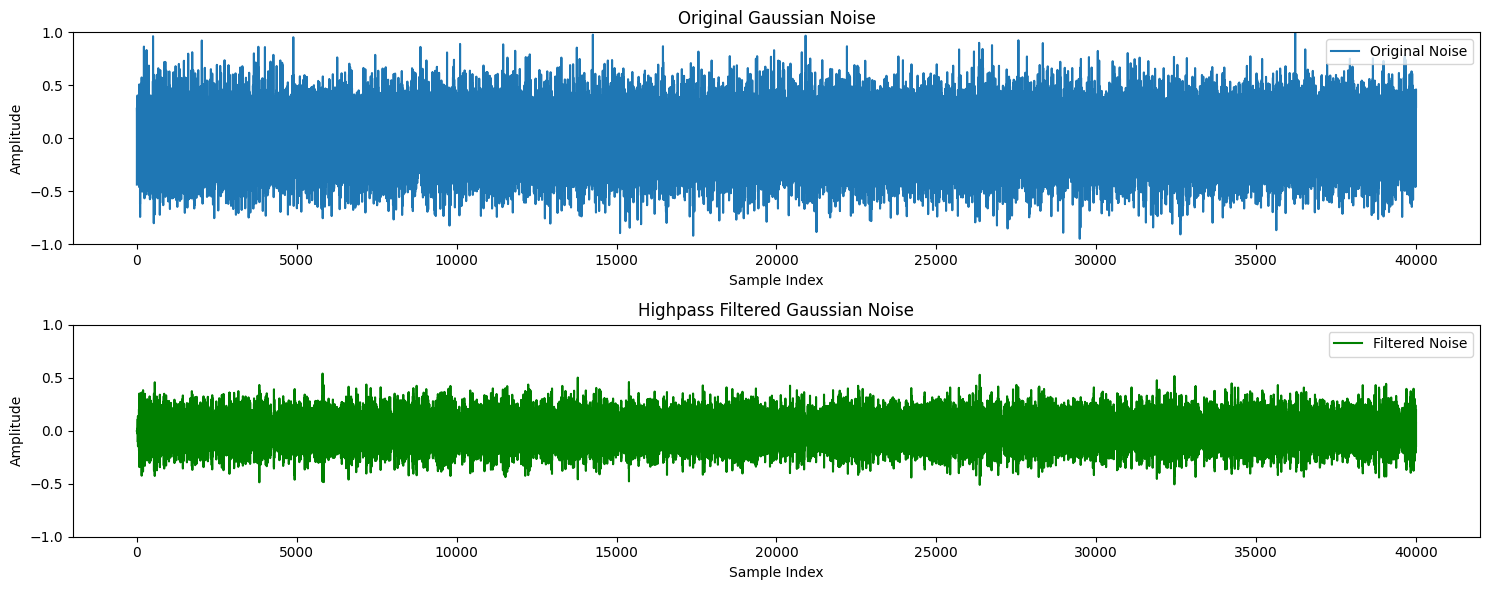

In [369]:
use_filter_on_wav("gaussian_noise.wav", "highpass", "highpass_filtered_gaussian_noise.wav", "Original Gaussian Noise", "Highpass Filtered Gaussian Noise")

# 3.c Bandpass Filter

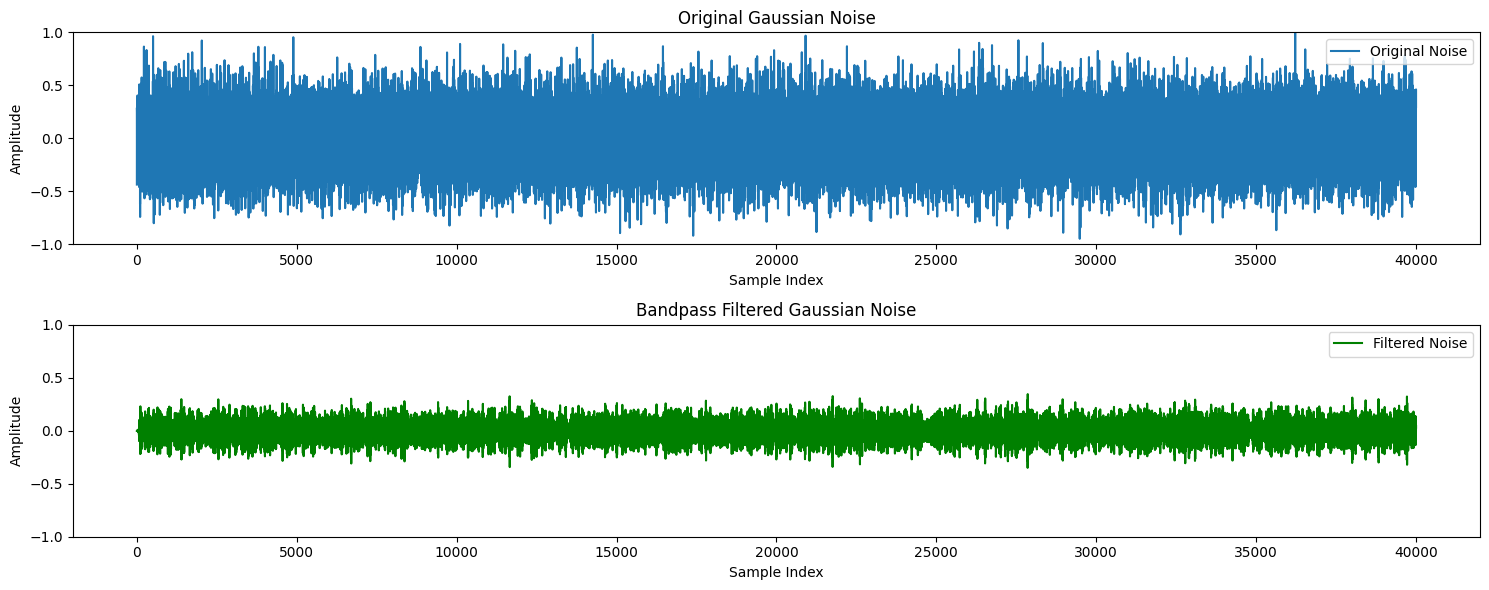

In [370]:
use_filter_on_wav("gaussian_noise.wav", "bandpass", "band_filtered_gaussian_noise.wav", "Original Gaussian Noise", "Bandpass Filtered Gaussian Noise")

# 4. Running a Speech through Filters

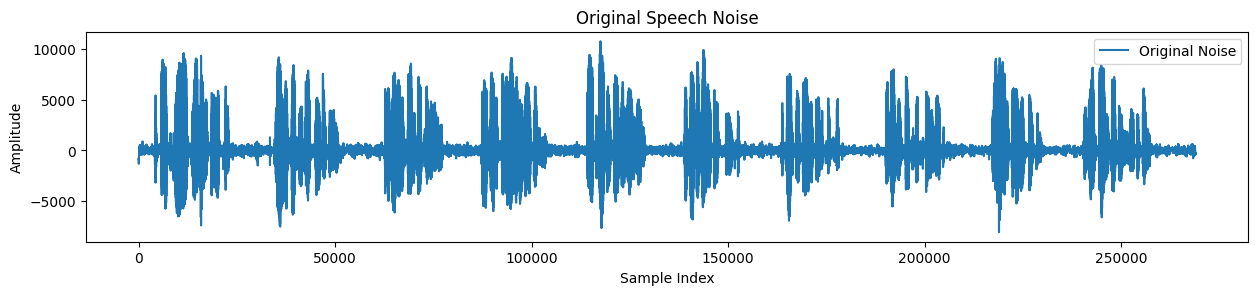

In [371]:
sampling_rate_speech, data_speech = wavfile.read('speech.wav')
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(data_speech, label='Original Noise')
plt.title('Original Speech Noise')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

# 4.a Speech through Lowpass Filter

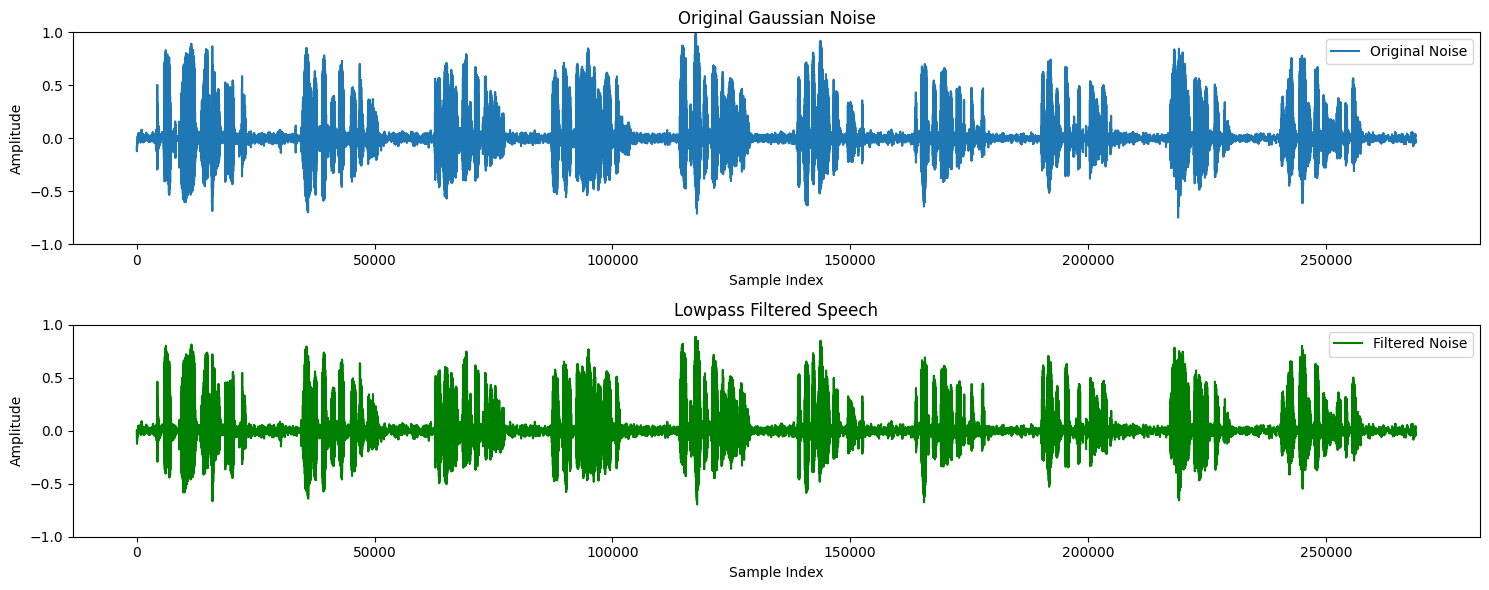

In [372]:
use_filter_on_wav("speech.wav", "lowpass", "lowpass_filtered_speech.wav", "Original Gaussian Noise", "Lowpass Filtered Speech")

# 4.b Speech through a Highpass filter

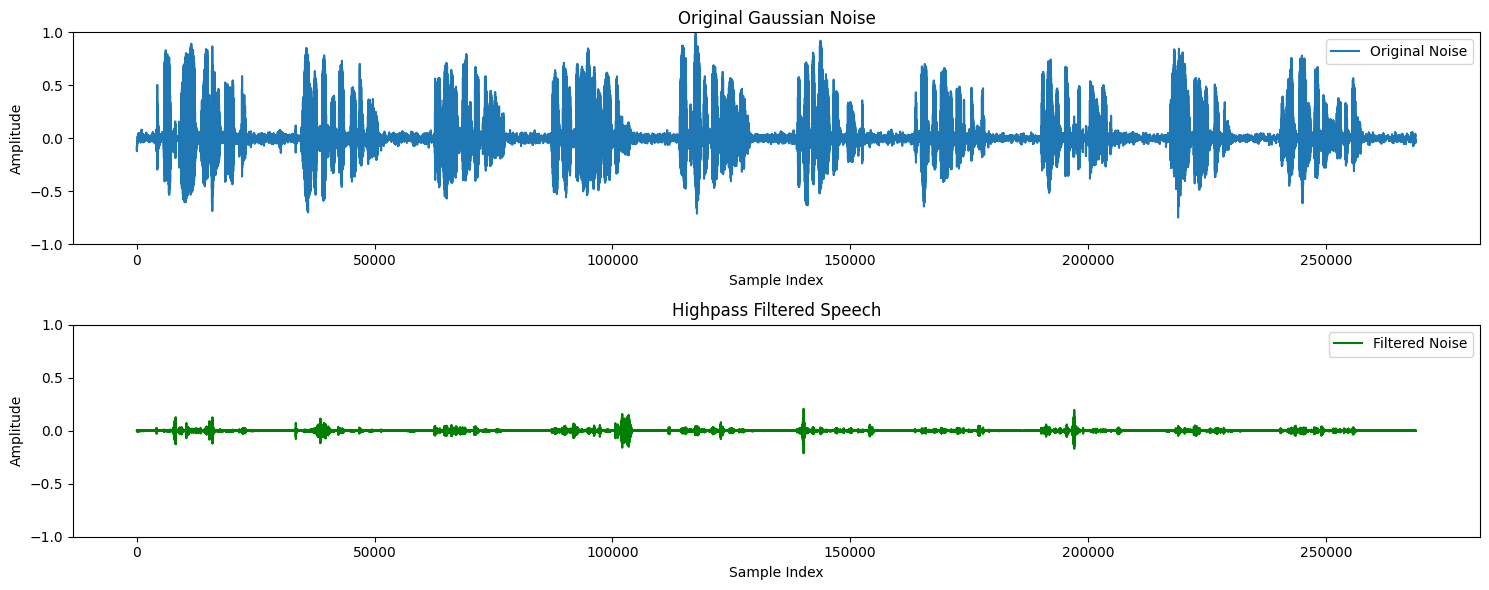

In [373]:
use_filter_on_wav("speech.wav", "highpass", "highpass_filtered_speech.wav", "Original Gaussian Noise", "Highpass Filtered Speech")

# 4.c Speech Through Bandpass Filter

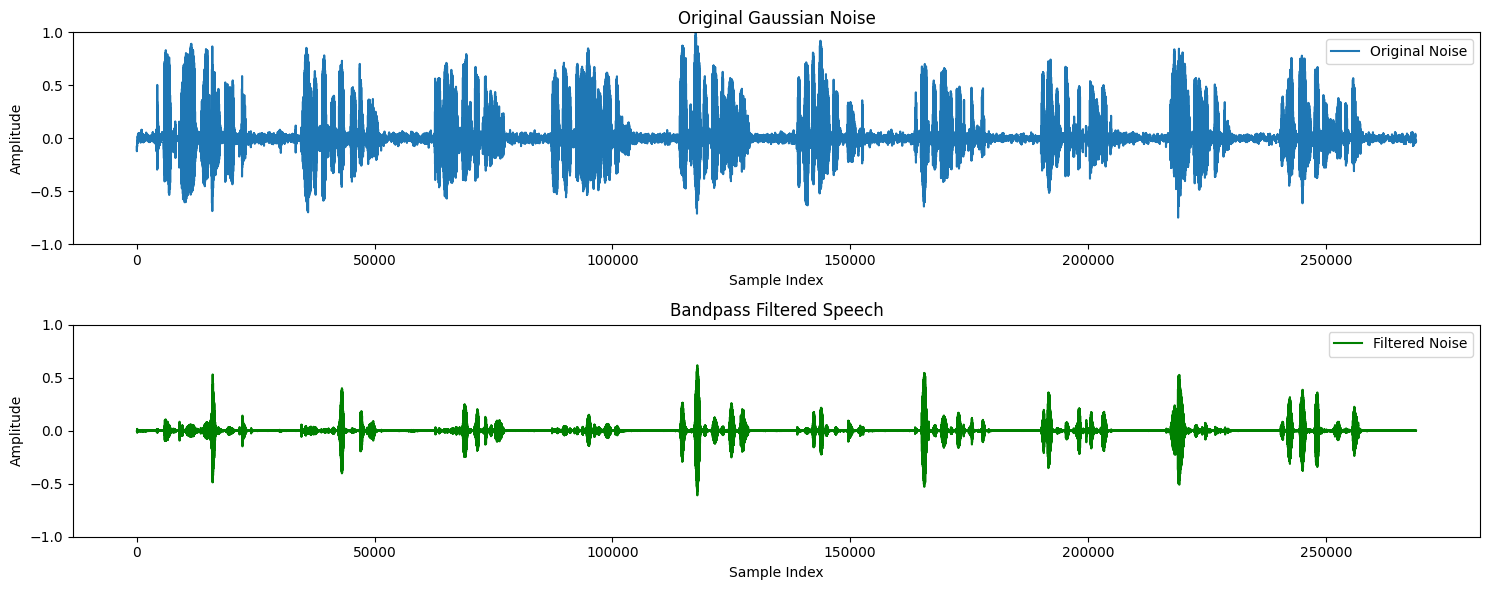

In [374]:
use_filter_on_wav("speech.wav", "bandpass", "bandpass_filtered_speech.wav", "Original Gaussian Noise", "Bandpass Filtered Speech")

# 5. Observations

When listening to either of the lowpass wav files created, it is clear that the higher frequencies have been filtered out.
When listening to either of the highpass wav files created, it is clear that the lower frequencies have been filtered out.
When listening to either of the bandpass wav files created, it is clear that the higher and lower frequencies have been filtered out. We can only hear a middle range of frequencies